# CICIDS - 2017 Dataset Exploratory data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!ls -R

.:
complete-ids-demo.py  GeneratedLabelledFlows.zip
data		      setup-guide.md
EDA.ipynb	      Towards_a_Reliable_Intrusion_Detection_Benchmark_D.pdf

./data:
cicids17_csv

./data/cicids17_csv:
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv


## Data loading

### Monday : Benign

In [4]:
monday_df = pd.read_csv('data/cicids17_csv/Monday-WorkingHours.pcap_ISCX.csv')
monday_df.columns = monday_df.columns.str.strip()

### Tuesday : Patator

In [5]:
tuesday_df =  pd.read_csv('data/cicids17_csv/Tuesday-WorkingHours.pcap_ISCX.csv')
tuesday_df.columns = tuesday_df.columns.str.strip()
tuesday_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
tuesday_df['Label'].value_counts()

Label
BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name: count, dtype: int64

### Wednesday : DoS

In [7]:
wednesday_df =  pd.read_csv('data/cicids17_csv/Wednesday-workingHours.pcap_ISCX.csv')
wednesday_df.columns = wednesday_df.columns.str.strip()
wednesday_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
wednesday_df['Label'].value_counts()

Label
BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64

### Thursday Morning : WebAttacks

In [9]:
thursday_morning_df = pd.read_csv('data/cicids17_csv/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
thursday_morning_df.columns = thursday_morning_df.columns.str.strip()
thursday_morning_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [10]:
thursday_morning_df['Label'].value_counts()

Label
BENIGN                        168186
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name: count, dtype: int64

### Thursday Afternoon : Infilteration

In [11]:
thursday_afternoon_df = pd.read_csv('data/cicids17_csv/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
thursday_afternoon_df.columns = thursday_afternoon_df.columns.str.strip()
thursday_afternoon_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [12]:
thursday_afternoon_df.Label.value_counts()

Label
BENIGN          288566
Infiltration        36
Name: count, dtype: int64

### Friday Morning : Bot Attack

In [13]:
friday_morning_df = pd.read_csv('data/cicids17_csv/Friday-WorkingHours-Morning.pcap_ISCX.csv')
friday_morning_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [14]:
friday_morning_df.columns = friday_morning_df.columns.str.strip()

In [15]:
friday_morning_df['Label'].value_counts()

Label
BENIGN    189067
Bot         1966
Name: count, dtype: int64

### Friday Afternoon : DDoS

In [16]:
friday_afternoon_df = pd.read_csv('data/cicids17_csv/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
friday_afternoon_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [17]:
friday_afternoon_df.columns = friday_afternoon_df.columns.str.strip()

In [18]:
friday_afternoon_df.Label.value_counts()

Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

In [19]:
pd.set_option('display.max_columns', None)
friday_afternoon_df[friday_afternoon_df['Label'] == 'DDoS'].describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,128027.000000,1.280270e+05,128027.000000,128027.000000,128027.000000,128027.000000,128027.000000,128027.000000,128027.000000,128027.000000,128027.000000,128027.000000,128027.000000,128027.000000,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,128027.000000,128027.0,128027.0,128027.0,128027.0,128027.000000,128027.000000,1.280270e+05,128027.000000,128027.000000,128027.000000,128027.000000,128027.000000,1.280270e+05,128027.000000,128027.0,128027.0,128027.000000,128027.000000,128027.000000,128027.0,128027.0,128027.000000,128027.000000,128027.000000,128027.000000,128027.000000,128027.0,128027.0,128027.0,128027.0,128027.0,128027.0,128027.000000,128027.000000,128027.000000,128027.000000,128027.000000,128027.000000,128027.000000,128027.0,1.280270e+05,128027.0,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05,1.280270e+05
mean,81.227382,1.695559e+07,4.472439,3.255821,31.908597,7373.634999,14.897639,2.185039,7.401262,5.721986,4604.362041,0.592055,1481.026492,2102.589207,inf,inf,1.881524e+06,5.111861e+06,1.583782e+07,2.442396e+03,1.651670e+07,2.654833e+06,6.134267e+06,1.552693e+07,2.647938e+03,4.439151e+05,1.118197e+05,2.186931e+05,4.395084e+05,78.573473,0.0,0.0,0.0,0.0,97.096144,72.727503,1.021375e+02,70.648396,2.185039,4606.544877,736.885283,1577.775484,4.257342e+06,0.000211,0.0,0.0,0.454474,0.546822,0.000023,0.0,0.0,0.624142,822.612002,7.401262,1481.026492,97.096144,0.0,0.0,0.0,0.0,0.0,0.0,4.472439,31.908597,3.255821,7373.634999,3889.892929,145.407266,3.289689,20.0,2.007934e+05,0.0,2.007934e+05,2.007934e+05,1.198531e+07,4.481514e+06,1.515424e+07,8.816415e+06
std,267.409863,3.101261e+07,1.897807,2.554291,11.957077,5584.659449,6.737902,2.887197,1.237328,4.672057,3966.341767,28.267397,1164.873153,1869.385632,NaN,NaN,2.560309e+06,8.084490e+06,2.866764e+07,1.993445e+05,3.092439e+07,4.298210e+06,1.063195e+07,2.883054e+07,1.993590e+05,5.884675e+05,1.530927e+05,2.947109e+05,5.868700e+05,696.096163,0.0,0.0,0.0,0.0,38.291094,56.672115,6.338440e+03,3914.607267,2.887197,3963.808030,584.547610,1329.895674,4.553442e+06,0.014521,0.0,0.0,0.497925,0.497805,0.004841,0.0,0.0,0.763424,658.844814,1.237328,1164.873153,38.291094,0.0,0.0,0.0,0.0,0.0,0.0,1.897807,11.957077,2.554291,5584.659449,4052.453956,110.628540,1.558427,0.0,7.843330e+05,0.0,7.843330e+05,7.843330e+05,2.337210e+07,1.410778e+07,2.900686e+07,2.121653e+07
min,80.000000,0.000000e+00,1.000000,0.000000,6.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.212181e-01,3.686968e-02,0.000000e+00,0.000000e+00,0.000000e

### Friday afternoon : Port scan

In [20]:
friday_afternoon_ps_df = pd.read_csv('data/cicids17_csv/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
friday_afternoon_ps_df.columns = friday_afternoon_ps_df.columns.str.strip()
friday_afternoon_ps_df.Label.value_counts()

Label
PortScan    158930
BENIGN      127537
Name: count, dtype: int64

In [21]:
pd.set_option('display.max_columns', None)
friday_afternoon_ps_df[friday_afternoon_ps_df['Label'] == 'PortScan']['Destination Port'].value_counts().head(10)

Destination Port
80       373
21       244
22       243
443      240
444      209
139      197
445      179
1069     160
10003    160
2103     160
Name: count, dtype: int64

## Correlation Analysis

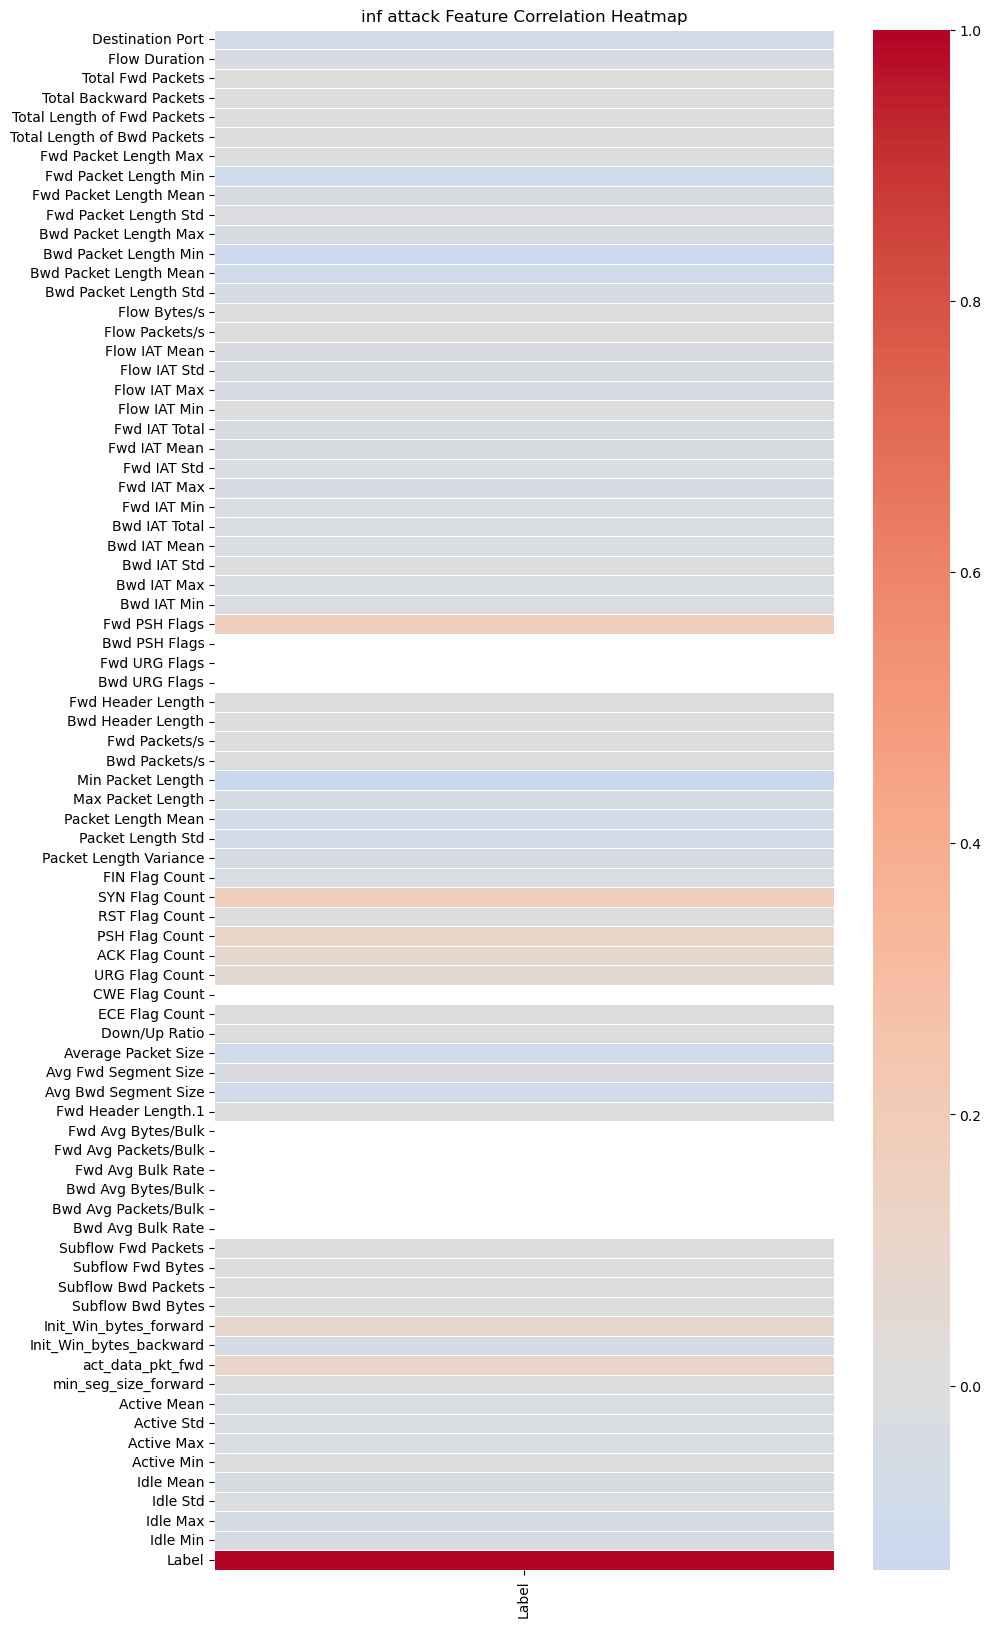

In [20]:
pat_enc = tuesday_df.copy()
pat_enc['Label'] = pat_enc['Label'].apply(lambda x : 0 if x =='BENIGN' else 1)
pat_corr_matrix = pat_enc.corr()
plt.figure(figsize=(10,20))
sns.heatmap(pat_corr_matrix['Label'].to_frame(), annot=False, cmap='coolwarm', center=0, linewidth=0.5)
plt.title('inf attack Feature Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

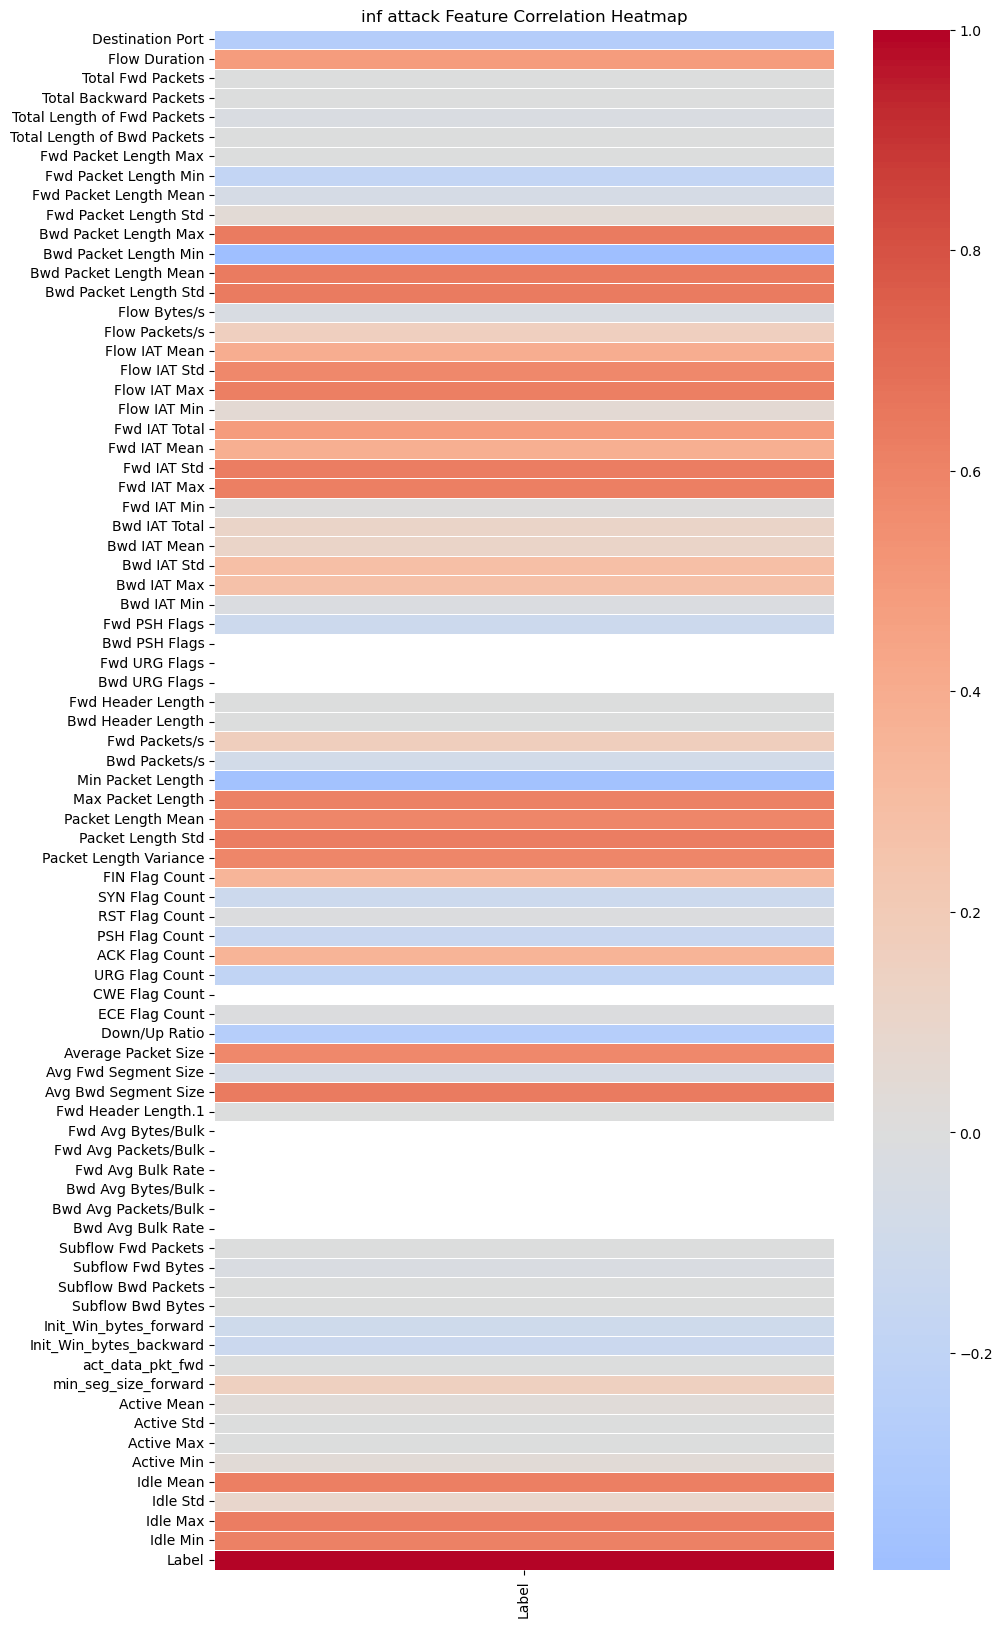

In [21]:
dos_enc = wednesday_df.copy()
dos_enc['Label'] = dos_enc['Label'].apply(lambda x : 0 if x =='BENIGN' else 1)
dos_corr_matrix = dos_enc.corr()
plt.figure(figsize=(10,20))
sns.heatmap(dos_corr_matrix['Label'].to_frame(), annot=False, cmap='coolwarm', center=0, linewidth=0.5)
plt.title('inf attack Feature Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

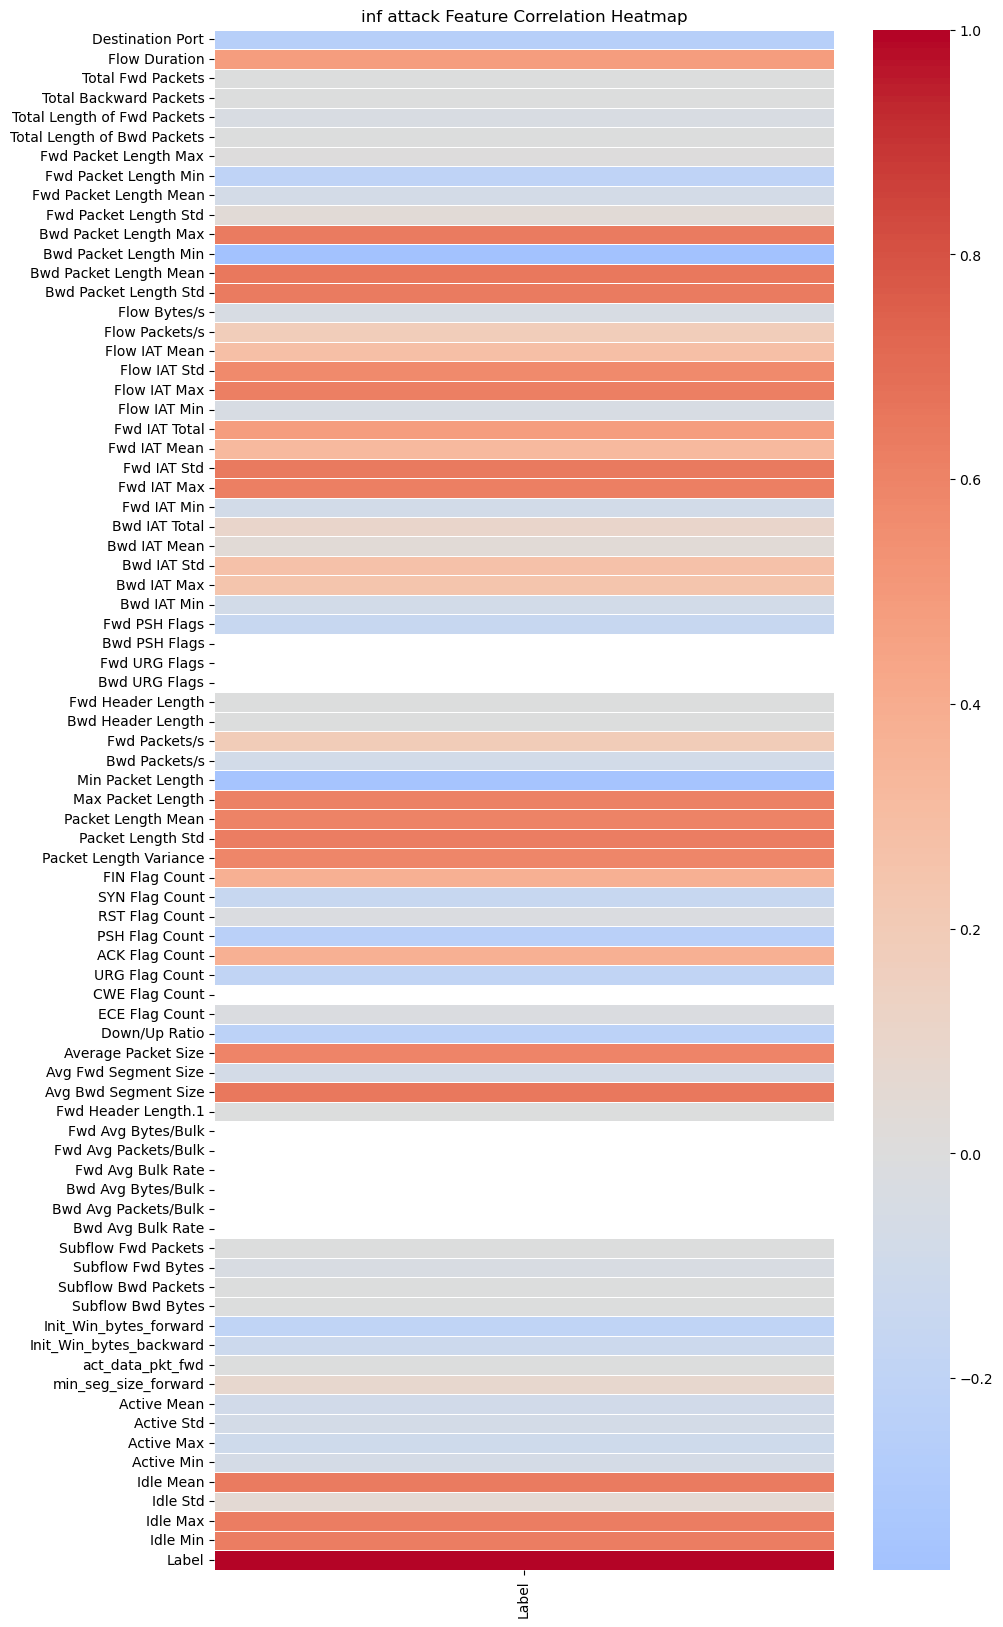

In [22]:
dos_enc = wednesday_df.copy()
dos_enc['Label'] = dos_enc['Label'].apply(lambda x : 1 if x =='DoS Hulk' else 0)
dos_corr_matrix = dos_enc.corr()
plt.figure(figsize=(10,20))
sns.heatmap(dos_corr_matrix['Label'].to_frame(), annot=False, cmap='coolwarm', center=0, linewidth=0.5)
plt.title('inf attack Feature Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

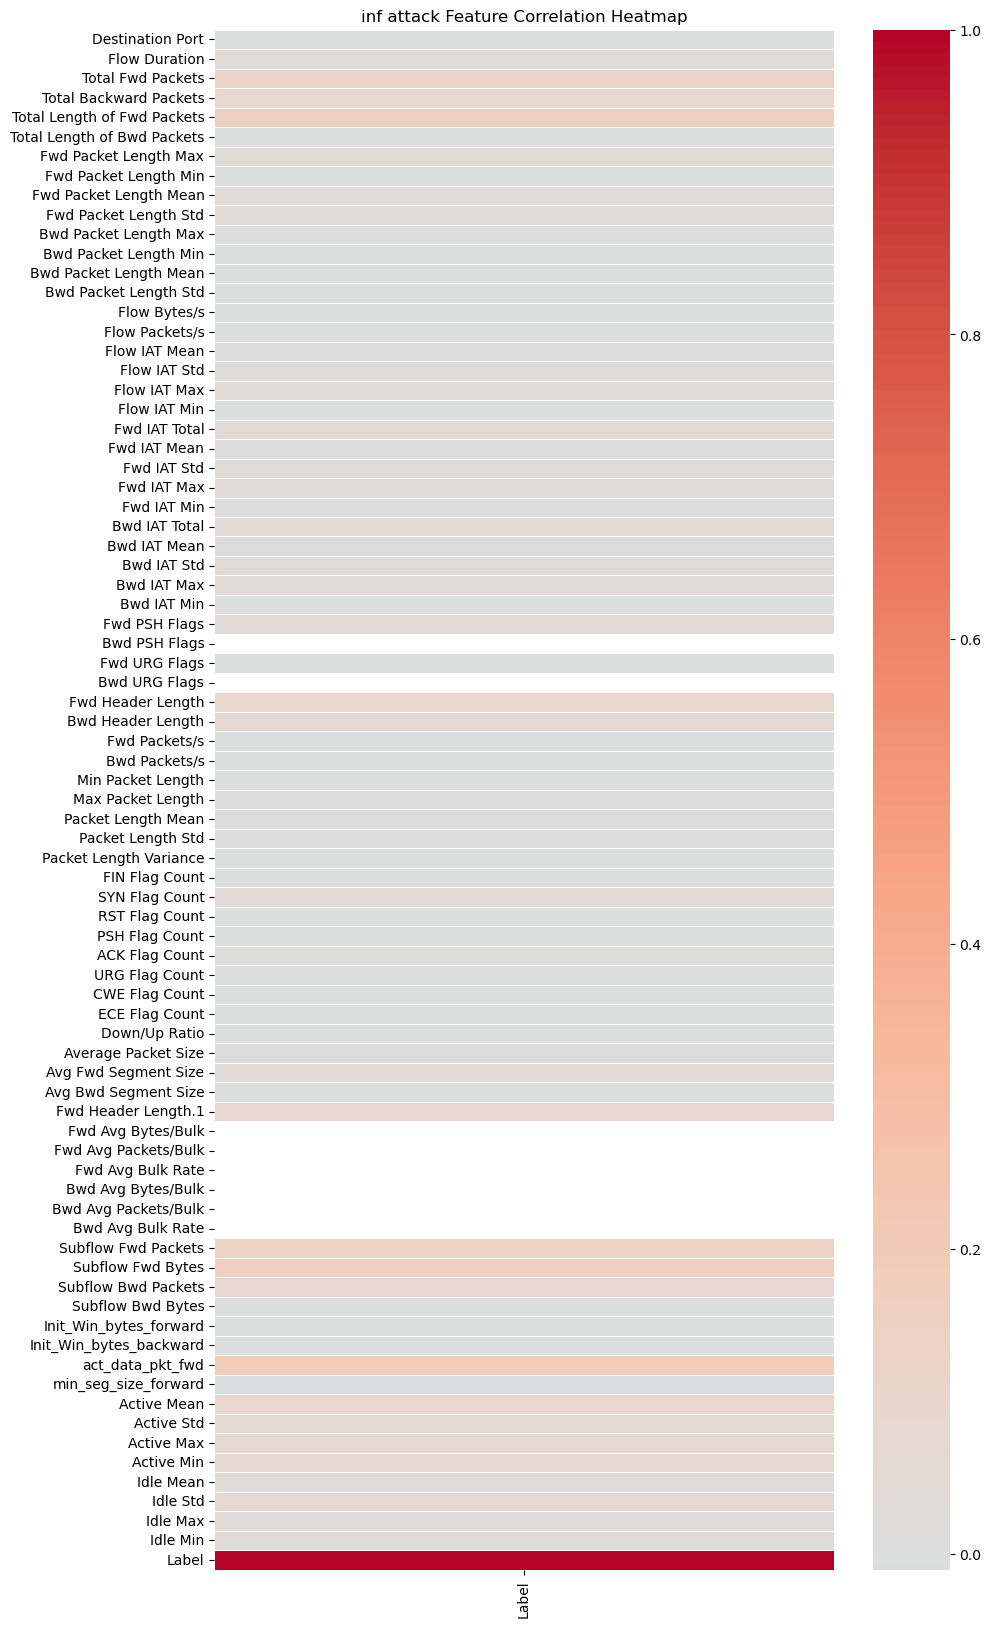

In [23]:
inf_enc = thursday_afternoon_df.copy()
inf_enc['Label'] = inf_enc['Label'].apply(lambda x : 0 if x =='BENIGN' else 1)
inf_corr_matrix = inf_enc.corr()
plt.figure(figsize=(10,20))
sns.heatmap(inf_corr_matrix['Label'].to_frame(), annot=False, cmap='coolwarm', center=0, linewidth=0.5)
plt.title('inf attack Feature Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

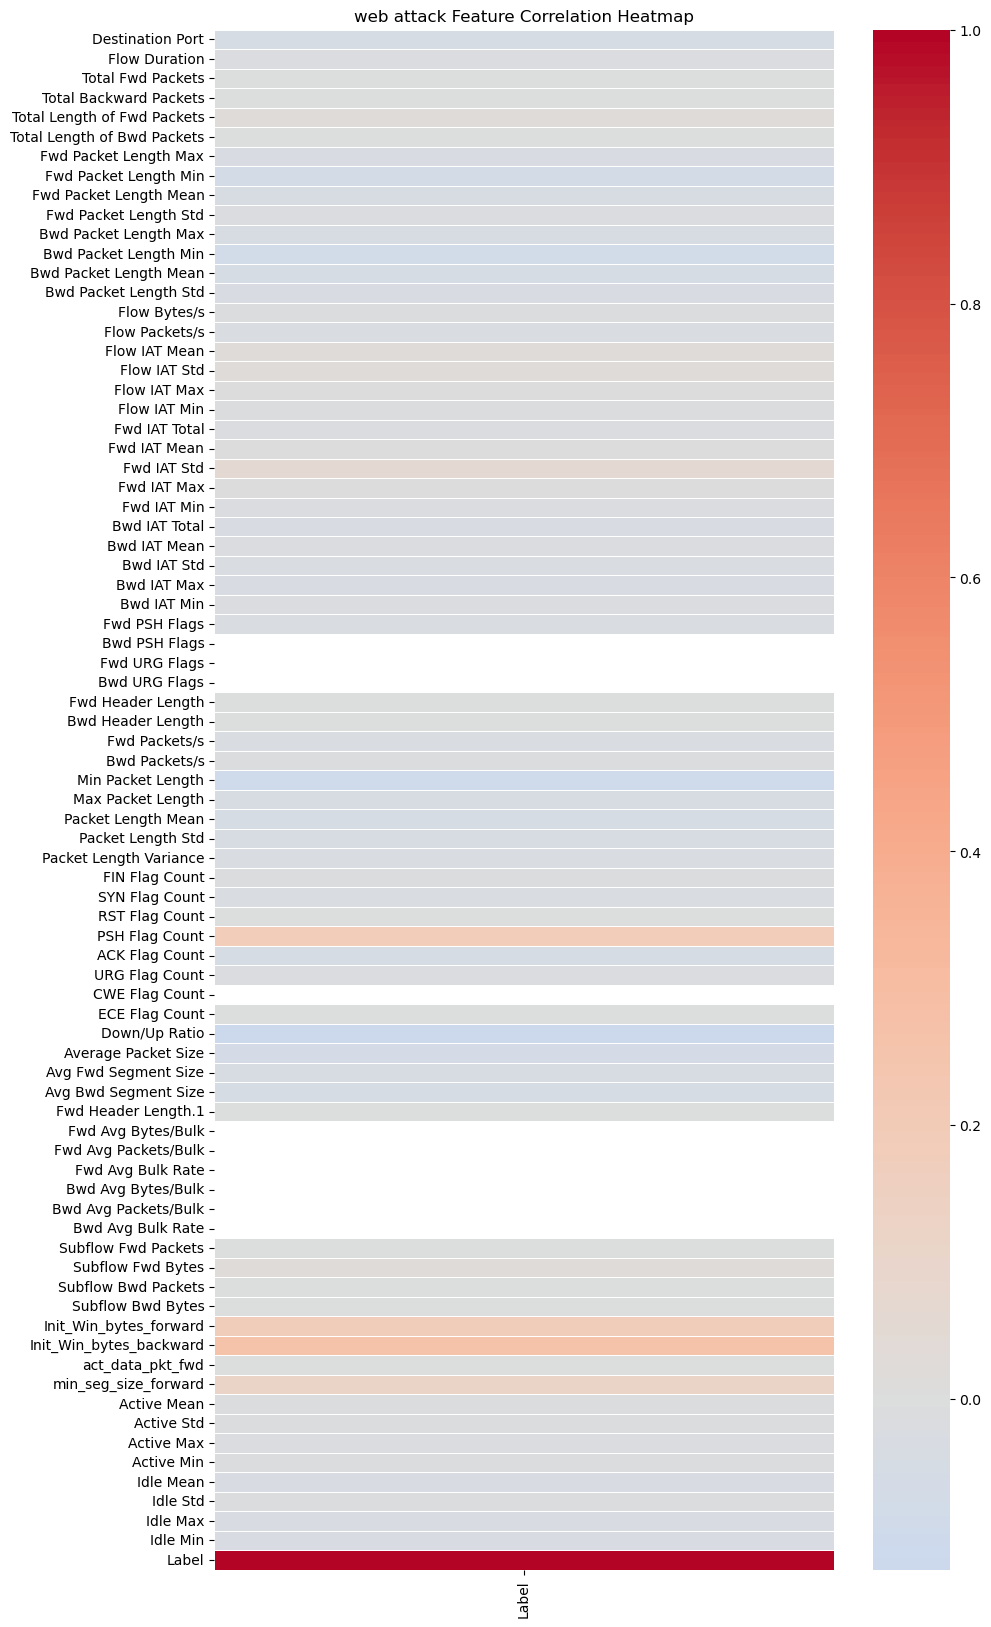

In [24]:
web_enc = thursday_morning_df.copy()
web_enc['Label'] = web_enc['Label'].apply(lambda x : 0 if x =='BENIGN' else 1)
web_corr_matrix = web_enc.corr()
plt.figure(figsize=(10,20))
sns.heatmap(web_corr_matrix['Label'].to_frame(), annot=False, cmap='coolwarm', center=0, linewidth=0.5)
plt.title('web attack Feature Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [29]:
bot_enc = friday_morning_df.copy()
bot_enc['Label'] = bot_enc['Label'].apply(lambda x : 1 if x == 'Bot' else 0)

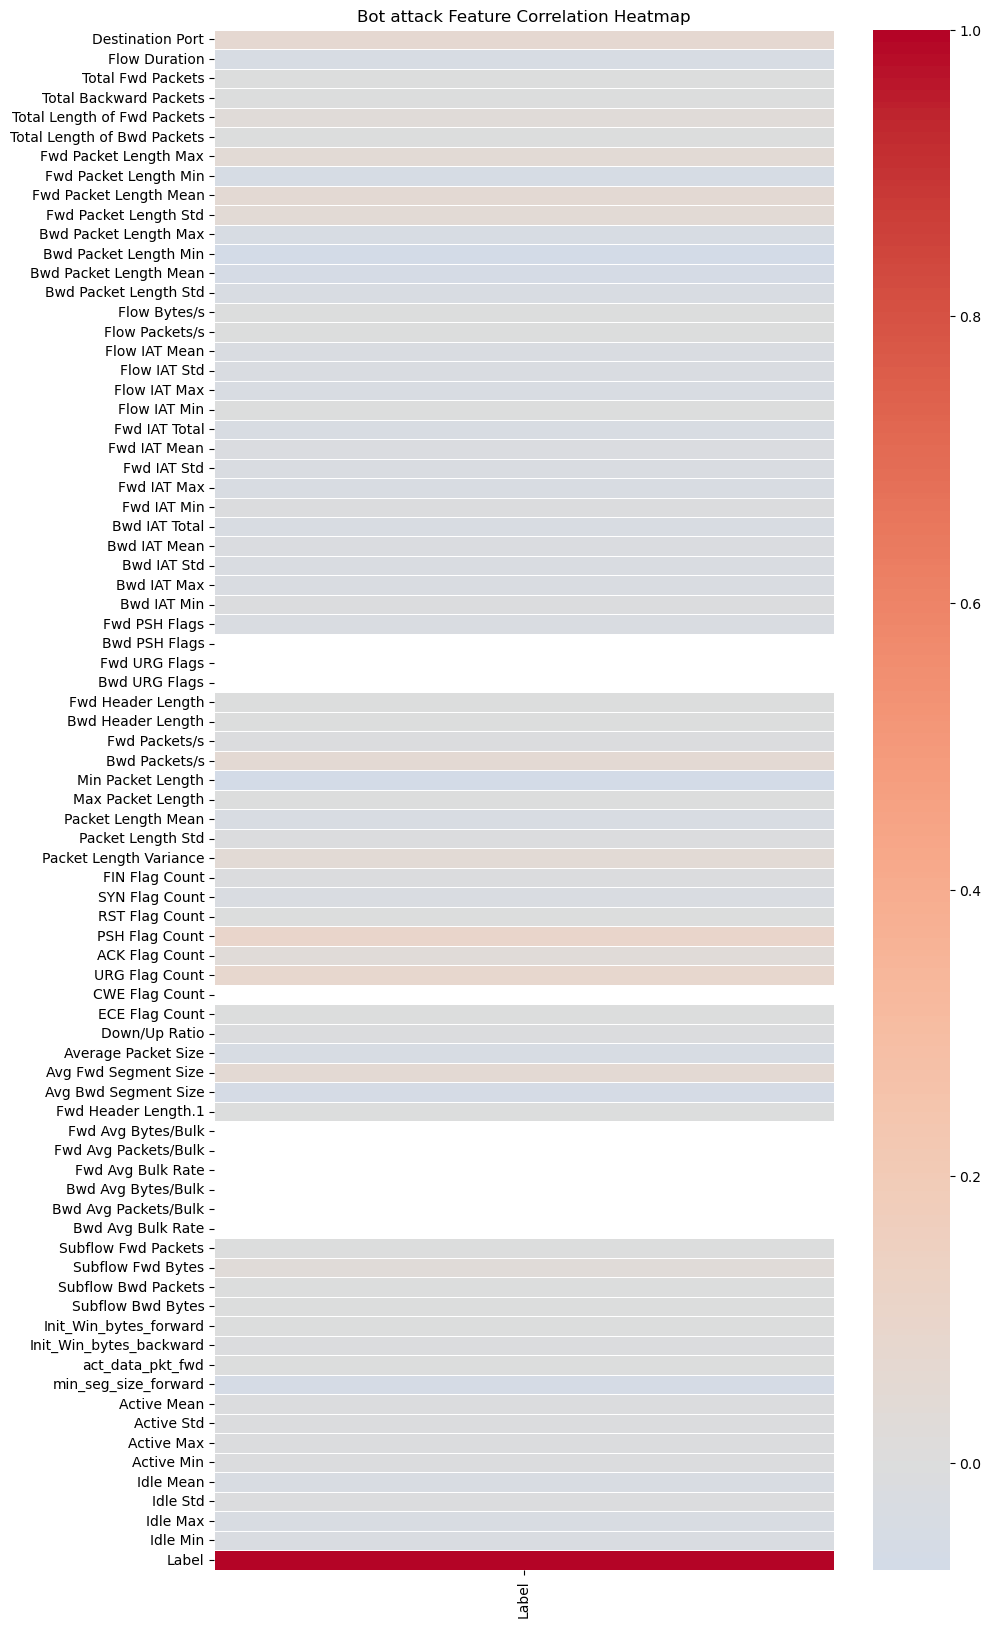

In [30]:
bot_corr_matrix = bot_enc.corr()
plt.figure(figsize=(10,20))
sns.heatmap(bot_corr_matrix['Label'].to_frame(), annot=False, cmap='coolwarm', center=0, linewidth=0.5)
plt.title('Bot attack Feature Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

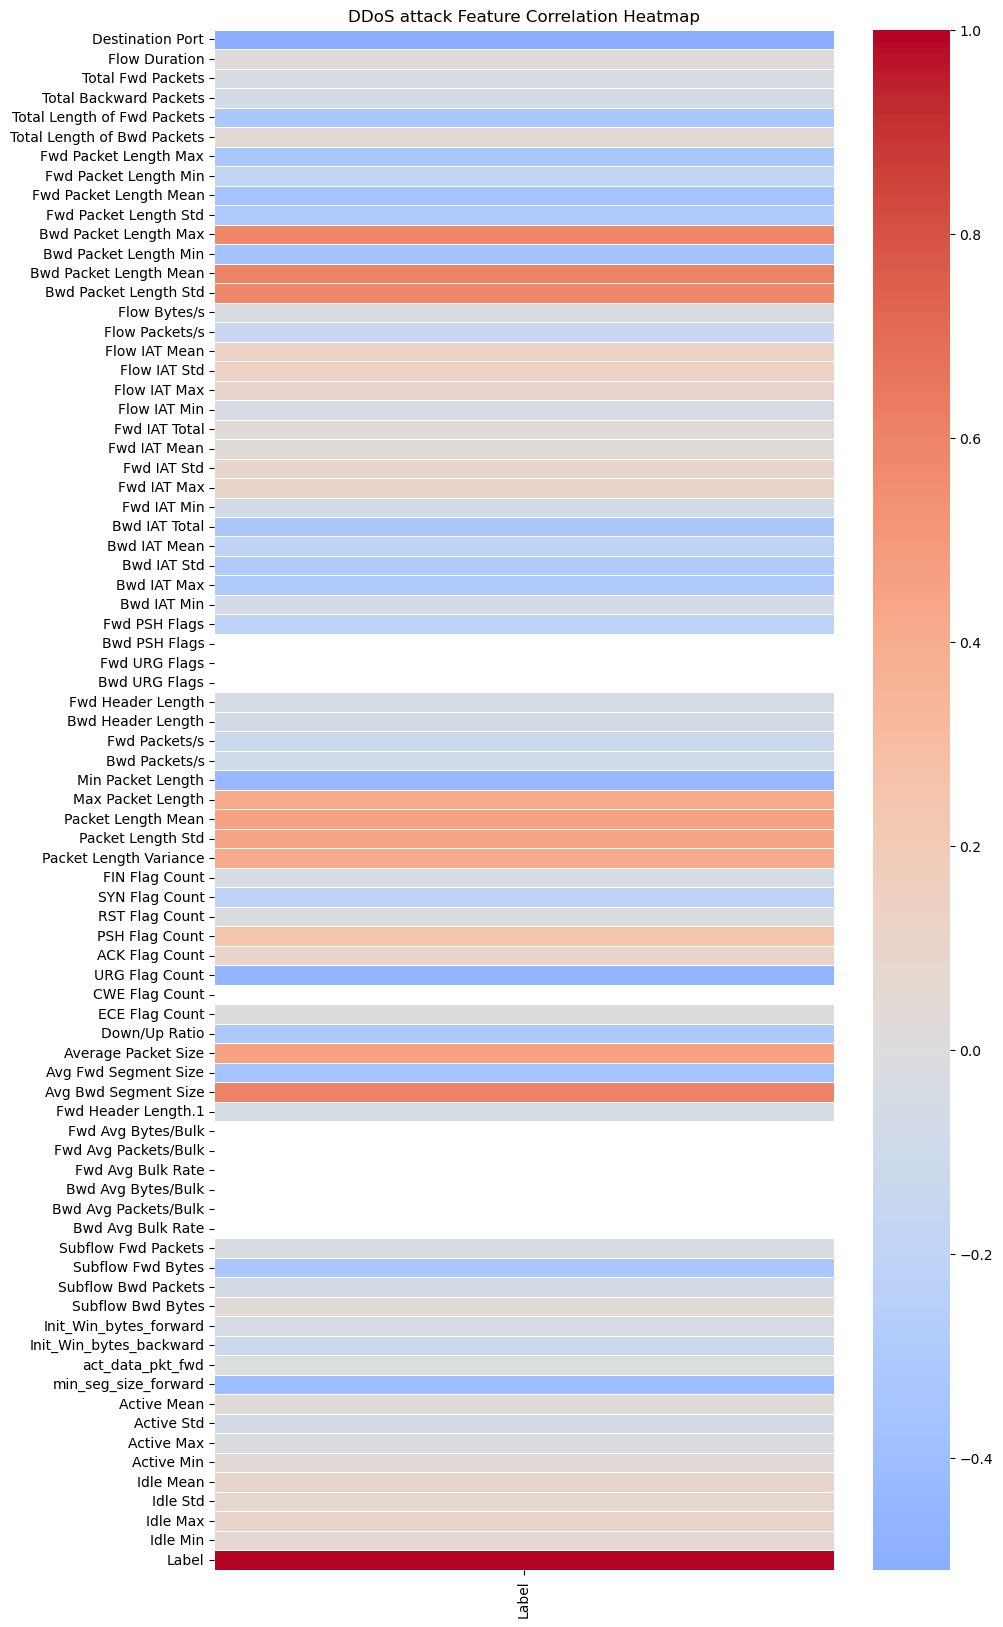

In [27]:
DDoS_enc = friday_afternoon_df.copy()
DDoS_enc['Label'] = DDoS_enc['Label'].apply(lambda x : 1 if x == 'DDoS' else 0)
DDoS_corr_matrix = DDoS_enc.corr()
plt.figure(figsize=(10,20))
sns.heatmap(DDoS_corr_matrix['Label'].to_frame(), annot=False, cmap='coolwarm', center=0, linewidth=0.5)
plt.title('DDoS attack Feature Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

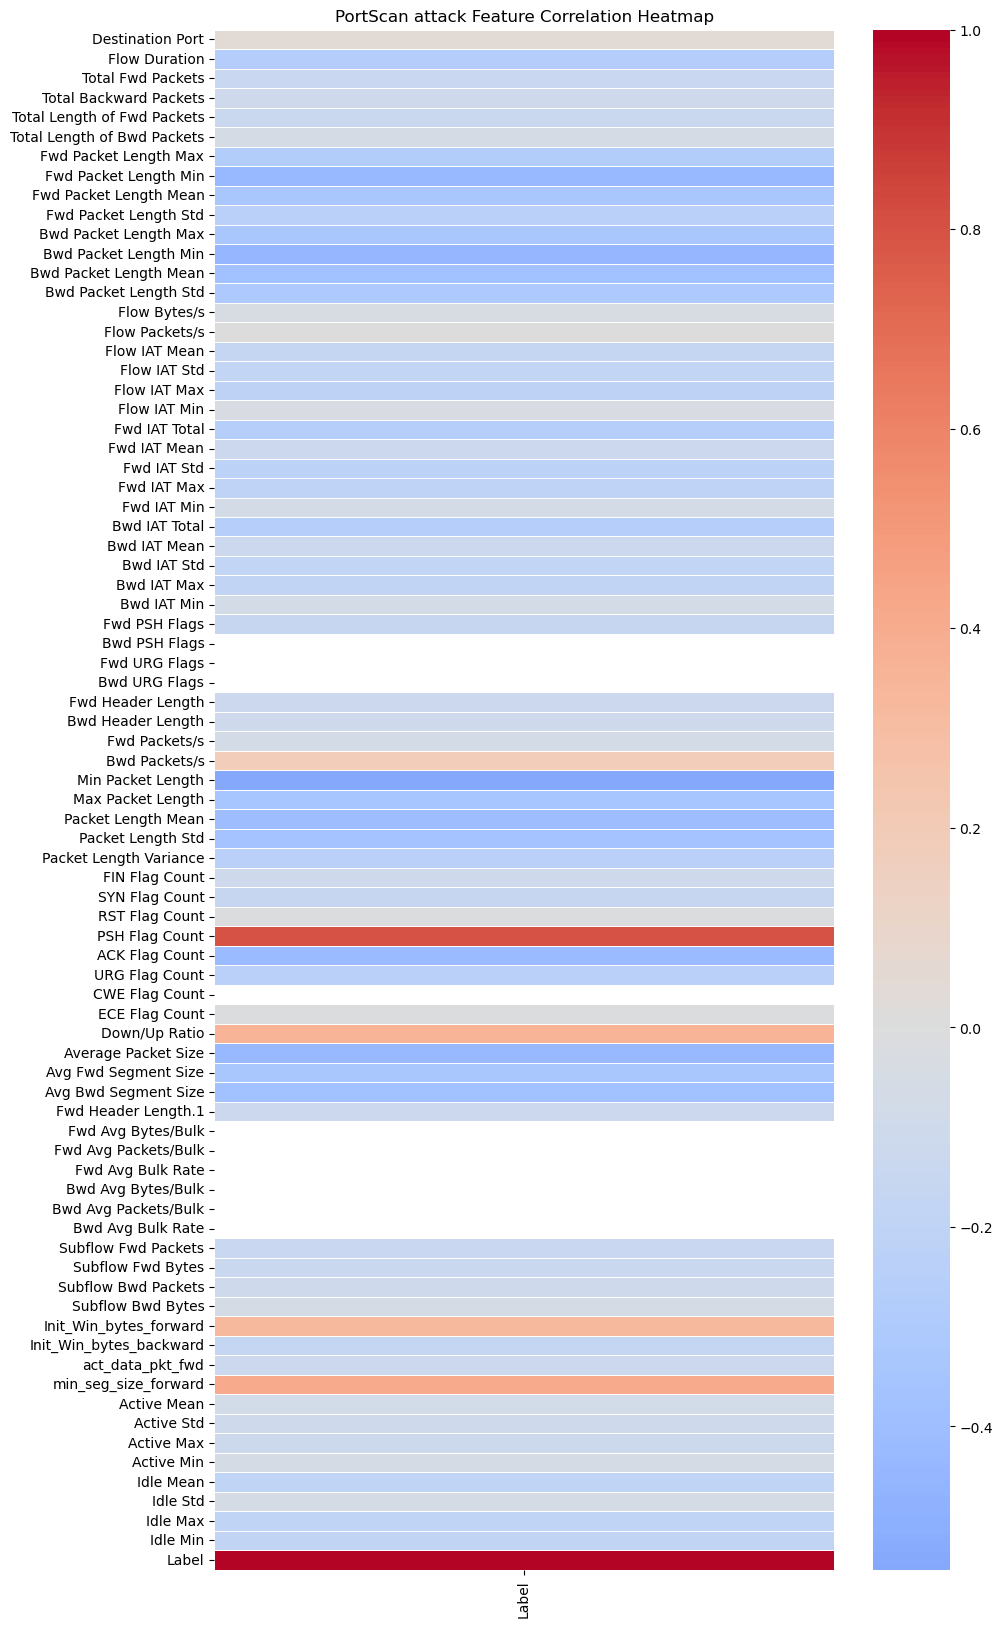

In [28]:
PortScan_enc = friday_afternoon_ps_df.copy()
PortScan_enc['Label'] = PortScan_enc['Label'].apply(lambda x : 1 if x == 'PortScan' else 0)
PortScan_corr_matrix = PortScan_enc.corr()
plt.figure(figsize=(10,20))
sns.heatmap(PortScan_corr_matrix['Label'].to_frame(), annot=False, cmap='coolwarm', center=0, linewidth=0.5)
plt.title('PortScan attack Feature Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Data Cleaning

### Merging all the datasets

In [22]:
merged_df = pd.concat([monday_df,tuesday_df,wednesday_df,thursday_morning_df,thursday_afternoon_df,friday_morning_df,friday_afternoon_df,friday_afternoon_ps_df], axis = 0)

In [23]:
merged_df.sample(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
276316,80,32098,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,62.309178,3.209800e+04,0.000000e+00,32098,32098,0,0.000000e+00,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,32,32,31.154589,31.154589,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,488,137,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
218379,80,85642217,6,7,348,11595,330,0,58.000000,133.284658,4344,0,1656.428571,1947.638216,1.394523e+02,0.151794,7.136851e+06,2.470000e+07,85500000,46,85500000,1.710000e+07,3.820000e+07,85500000,46,85600000,1.430000e+07,3.490000e+07,85500000,91,0,0,0,0,164,232,0.070059,0.081735,0,4344,853.500000,1565.901792,2.452048e+06,1,0,0,0,0,0,0,0,1,919.153846,58.000000,1656.428571,164,0,0,0,0,0,0,6,348,7,11595,0,235,3,20,6000.0,0.0,6000,6000,85500000.0,0.0,85500000,85500000,DoS Hulk
24867,49934,397,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,3.022670e+04,5037.783375,3.970000e+02,0.000000e+00,397,397,397,3.970000e+02,0.000000e+00,397,397,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,0,5037.783375,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,10291,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
391576,53,48496,4,2,116,344,29,29,29.000000,0.000000,172,172,172.000000,0.000000,9.485318e+03,123.721544,9.699200e+03,1.426662e+04,31629,3,31637,1.054567e+04,1.825870e+04,31629,4,3,3.000000e+00,0.000000e+00,3,3,0,0,0,0,104,40,82.481029,41.240515,29,172,69.857143,69.776855,4.868810e+03,0,0,0,0,0,0,0,0,0,81.500000,29.000000,172.000000,104,0,0,0,0,0,0,4,116,2,344,-1,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
138892,80,115958487,7,4,330,11595,330,0,47.142857,124.728276,11595,0,2898.750000,5797.500000,1.028385e+02,0.094862,1.160000e+07,3.140000e+07,99900000,1,116000000,1.930000e+07,4.000000e+07,99900000,1,1375,4.583333e+02,4.365940e+02,876,5,0,0,0,0,240,136,0.060366,0.034495,0,11595,993.750000,3339.875559,1.120000e+07,0,0,0,0,1,0,0,0,0,1084.090909,47.142857,2898.750000,240,0,0,0,0,0,0,7,330,4,11595,296,235,1,32,4.0,0.0,4,4,58000000.0,59300000.0,99900000,16000000,DoS Hulk
285987,80,5025455,3,1,12,0,6,0,4.000000,3.464102,0,0,0.000000,0.000000,2.387843e+00,0.795948,1.675152e+06,2.881287e+06,5002149,116,5025455,2.512728e+06,3.520574e+06,5002149,23306,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,72,32,0.596961,0.198987,0,6,2.400000,3.286335,1.080000e+01,0,0,0,1,0,0,0,0,0,3.000000,4.000000,0.000000,72,0,0,0,0,0,0,3,12,1,0,8192,65535,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
605749,53,255,2,2,84,162,42,42,42.000000,0.000000,81,81,81.000000,0.000000,9.647059e+05,15686.274510,8.500000e+01,6.408588e+01,159,48,48,4.800000e+01,0.000000e+00,48,48,48,4.800000e+01,0.0

In [24]:
merged_df.shape

(2830743, 79)

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 286466
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [26]:
pd.set_option('display.max_rows', None)
merged_df.isnull().sum()

Destination Port                  0
Flow Duration                     0
Total Fwd Packets                 0
Total Backward Packets            0
Total Length of Fwd Packets       0
Total Length of Bwd Packets       0
Fwd Packet Length Max             0
Fwd Packet Length Min             0
Fwd Packet Length Mean            0
Fwd Packet Length Std             0
Bwd Packet Length Max             0
Bwd Packet Length Min             0
Bwd Packet Length Mean            0
Bwd Packet Length Std             0
Flow Bytes/s                   1358
Flow Packets/s                    0
Flow IAT Mean                     0
Flow IAT Std                      0
Flow IAT Max                      0
Flow IAT Min                      0
Fwd IAT Total                     0
Fwd IAT Mean                      0
Fwd IAT Std                       0
Fwd IAT Max                       0
Fwd IAT Min                       0
Bwd IAT Total                     0
Bwd IAT Mean                      0
Bwd IAT Std                 

### Remove Duplicates

#### Duplicate Rows

In [27]:
num_duplicates = merged_df.duplicated(keep='first').sum()
print(f"Number of duplicates = {num_duplicates}")
print(f"Percentage of duplicates = {(num_duplicates/merged_df.shape[0])*100:.2f}%")

Number of duplicates = 308381
Percentage of duplicates = 10.89%


In [28]:
merged_df = merged_df.drop_duplicates(keep='first')
merged_df.shape

(2522362, 79)

#### Duplicate Columns

In [29]:
cols = list(merged_df.columns)
duplicate_cols = {}
cols_remanining = cols.copy()
for col1 in cols:
    duplicates = []
    for col2 in cols:
        if(col1!=col2):
            if(merged_df[col1].equals(merged_df[col2])):
                if (col1 not in duplicate_cols) and (col1 in cols_remanining):
                    duplicates.append(col2)
                    cols_remanining.remove(col2)
                elif (col1 in duplicate_cols) and (col1 in cols_remaining):
                    duplicates.append(col2)
                    cols_remanining.remove(col2)
    if duplicates:               
        duplicate_cols[col1] = duplicates

duplicate_cols

{'Total Fwd Packets': ['Subflow Fwd Packets'],
 'Total Backward Packets': ['Subflow Bwd Packets'],
 'Fwd PSH Flags': ['SYN Flag Count'],
 'Bwd PSH Flags': ['Bwd URG Flags',
  'Fwd Avg Bytes/Bulk',
  'Fwd Avg Packets/Bulk',
  'Fwd Avg Bulk Rate',
  'Bwd Avg Bytes/Bulk',
  'Bwd Avg Packets/Bulk',
  'Bwd Avg Bulk Rate'],
 'Fwd URG Flags': ['CWE Flag Count'],
 'Fwd Header Length': ['Fwd Header Length.1']}

In [30]:
for key, value in duplicate_cols.items():
    if(value in list(merged_df.columns)):
        merged_df = merged_df.drop(value,axis = 1)

In [31]:
merged_df.shape

(2522362, 79)

#### Handling Inf values

In [32]:
np.isinf(merged_df.drop(['Label'],axis=1,inplace=False)).sum() 

Destination Port                  0
Flow Duration                     0
Total Fwd Packets                 0
Total Backward Packets            0
Total Length of Fwd Packets       0
Total Length of Bwd Packets       0
Fwd Packet Length Max             0
Fwd Packet Length Min             0
Fwd Packet Length Mean            0
Fwd Packet Length Std             0
Bwd Packet Length Max             0
Bwd Packet Length Min             0
Bwd Packet Length Mean            0
Bwd Packet Length Std             0
Flow Bytes/s                   1211
Flow Packets/s                 1564
Flow IAT Mean                     0
Flow IAT Std                      0
Flow IAT Max                      0
Flow IAT Min                      0
Fwd IAT Total                     0
Fwd IAT Mean                      0
Fwd IAT Std                       0
Fwd IAT Max                       0
Fwd IAT Min                       0
Bwd IAT Total                     0
Bwd IAT Mean                      0
Bwd IAT Std                 

In [33]:
# replcaing inf with nan
merged_df.replace([np.inf,-np.inf], np.nan, inplace=True)

### Group by attacks

In [34]:
attacks = list(merged_df.Label.value_counts())
attack_counts = merged_df.Label.value_counts().reset_index()
attack_counts.columns = ['Attack Type', 'Number of Occurrences']
attack_counts

,Attack Type,Number of Occurrences
0,BENIGN,2096484
1,DoS Hulk,172849
2,DDoS,128016
3,PortScan,90819
4,DoS GoldenEye,10286
5,FTP-Patator,5933
6,DoS slowloris,5385
7,DoS Slowhttptest,5228
8,SSH-Patator,3219
9,Bot,1953


In [35]:
data_no_na = merged_df.dropna()

# Counting the total number of occurrences of each attack after dropping
occurrences_nonull = data_no_na['Label'].value_counts().reset_index()
occurrences_nonull.columns = ['Attack Type', 'Occurrences w/o Null Rows']

# Merging the DataFrames
attack_counts = attack_counts.merge(occurrences_nonull, on='Attack Type', how='left')

# Calculating the difference
attack_counts['Abs Difference'] = attack_counts['Number of Occurrences'] - attack_counts['Occurrences w/o Null Rows']
attack_counts['Difference %'] = ((attack_counts['Abs Difference'] * 100) / attack_counts['Number of Occurrences']).round(2)

# Visualization
attack_counts

,Attack Type,Number of Occurrences,Occurrences w/o Null Rows,Abs Difference,Difference %
0,BENIGN,2096484,2095057,1427,0.07
1,DoS Hulk,172849,172846,3,0.00
2,DDoS,128016,128014,2,0.00
3,PortScan,90819,90694,125,0.14
4,DoS GoldenEye,10286,10286,0,0.00
5,FTP-Patator,5933,5931,2,0.03
6,DoS slowloris,5385,5385,0,0.00
7,DoS Slowhttptest,5228,5228,0,0.00
8,SSH-Patator,3219,3219,0,0.00
9,Bot,1953,1948,5,0.26


In [36]:
# As the percentage of null values for each attack is very low we can drop rows with null values
merged_df.dropna(inplace=True)

In [37]:
merged_df.shape

(2520798, 79)

In [38]:
list(merged_df.Label.unique())

['BENIGN',
 'FTP-Patator',
 'SSH-Patator',
 'DoS slowloris',
 'DoS Slowhttptest',
 'DoS Hulk',
 'DoS GoldenEye',
 'Heartbleed',
 'Web Attack � Brute Force',
 'Web Attack � XSS',
 'Web Attack � Sql Injection',
 'Infiltration',
 'Bot',
 'DDoS',
 'PortScan']

In [39]:
attack_types = {
     'BENIGN' : 'BENIGN',
     'FTP-Patator' : 'Brute Force',
     'SSH-Patator' : 'Brute Force',
     'DoS slowloris' : 'DoS',
     'DoS Slowhttptest' : 'DoS',
     'DoS Hulk' : 'DoS',
     'DoS GoldenEye' : 'DoS',
     'Heartbleed' : 'Miscellaneous',
     'Web Attack � Brute Force' : 'Web Attack',
     'Web Attack � XSS' : 'Web Attack',
     'Web Attack � Sql Injection' : 'Web Attack',
     'Infiltration' : 'Infiltration',
     'Bot' : 'Bot',
     'DDoS' : 'DDos',
     'PortScan' : 'Port Scan'} 

In [40]:
merged_df['Label'] = merged_df['Label'].map(attack_types)

In [41]:
merged_df['Label'].value_counts()

Label
BENIGN           2095057
DoS               193745
DDos              128014
Port Scan          90694
Brute Force         9150
Web Attack          2143
Bot                 1948
Infiltration          36
Miscellaneous         11
Name: count, dtype: int64

In [42]:
# since Infiltration and Miscellaneous and have very are occurances we can drop them
merged_df.drop(merged_df[(merged_df['Label'] == 'Infiltration') | (merged_df['Label'] == 'Miscellaneous')].index, inplace=True)

In [115]:
merged_df.shape

(2520540, 67)

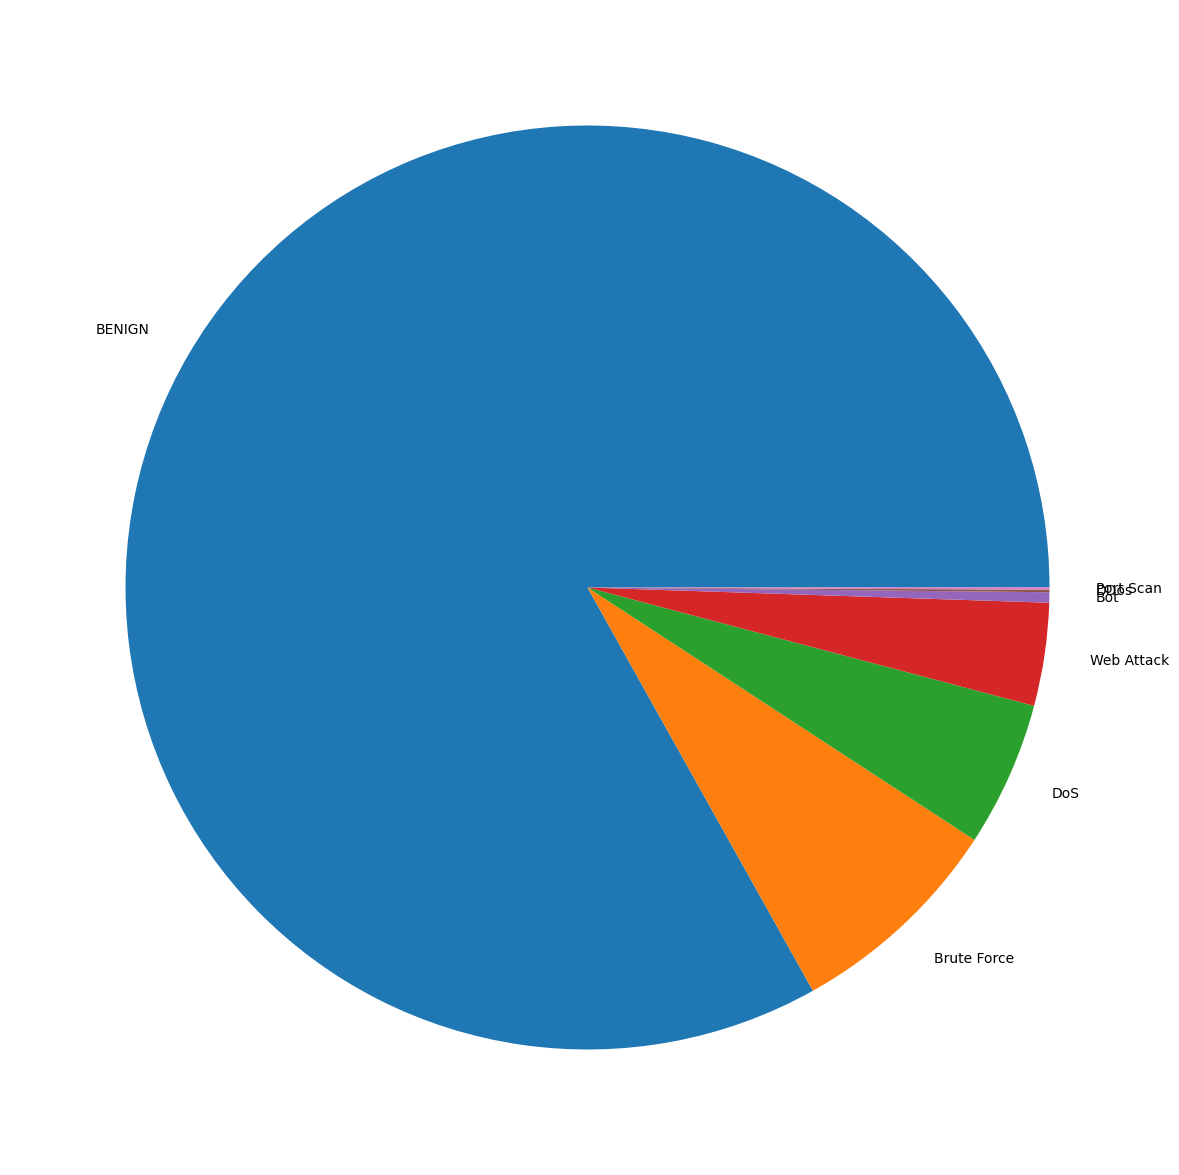

In [117]:
attacks = list(merged_df.Label.value_counts())
plt.figure(figsize = (15,15))
plt.pie(attacks, labels = merged_df.Label.unique())
plt.show()

### Checking Unique Values

In [43]:
merged_df.nunique()

Destination Port                 53789
Flow Duration                  1050763
Total Fwd Packets                 1413
Total Backward Packets            1731
Total Length of Fwd Packets      17913
Total Length of Bwd Packets      64686
Fwd Packet Length Max             5278
Fwd Packet Length Min              384
Fwd Packet Length Mean           99675
Fwd Packet Length Std           253846
Bwd Packet Length Max             4836
Bwd Packet Length Min              583
Bwd Packet Length Mean          147591
Bwd Packet Length Std           248836
Flow Bytes/s                   1593722
Flow Packets/s                 1240006
Flow IAT Mean                  1166158
Flow IAT Std                   1056509
Flow IAT Max                    580233
Flow IAT Min                    136307
Fwd IAT Total                   493053
Fwd IAT Mean                    737636
Fwd IAT Std                     700220
Fwd IAT Max                     437275
Fwd IAT Min                     110624
Bwd IAT Total            

In [44]:
# As Bwd PSH Flags has only one value we can drop it
merged_df.drop(['Bwd PSH Flags'], axis = 1, inplace=True)
merged_df.shape

(2520540, 78)

### Descriptive Analysis

In [45]:
merged_df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2520540.0,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2520540.0,2520540.0,2520540.0,2520540.0,2520540.0,2520540.0,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06,2.520540e+06
mean,8.690786e+03,1.659023e+07,1.025918e+01,1.155341e+01,6.065304e+02,1.811406e+04,2.311949e+02,1.920426e+01,6.350158e+01,7.731843e+01,9.748723e+02,4.316091e+01,3.405948e+02,3.765182e+02,1.410819e+06,4.729389e+04,1.446115e+06,3.278055e+06,1.029901e+07,1.704334e+05,1.625052e+07,2.919188e+06,3.668609e+06,1.014251e+07,1.135595e+06,1.110894e+07,2.027679e+06,1.668626e+06,5.260194e+06,1.086058e+06,4.866140e-02,3.173923e-05,0.0,-2.920383e+04,-2.556012e+03,4.086141e+04,6.513812e+03,1.683254e+01,1.063637e+03,1.906402e+02,3.301738e+02,5.457131e+05,3.209709e-02,4.866140e-02,2.721639e-04,2.976017e-01,3.118641e-01,1.013953e-01,3.173923e-05,2.733541e-04,7.004447e-01,2.124206e+02,6.350158e+01,3.405948e+02,-2.920383e+04,0.0,0.0,0.0,0.0,0.0,0.0,1.025918e+01,6.065186e+02,1.155341e+01,1.811368e+04,7.265502e+03,2.228806e+03,5.997515e+00,-3.082551e+03,9.151328e+04,4.616955e+04,1.719330e+05,6.541427e+04,9.337054e+06,5.656526e+05,9.763334e+06,8.892456e+06
std,1.901296e+04,3.523144e+07,7.944157e+02,1.056949e+03,1.011636e+04,2.398249e+06,7.562953e+02,6.080109e+01,1.955506e+02,2.968731e+02,2.038090e+03,7.088092e+01,6.325064e+02,8.810218e+02,2.657219e+07,2.026423e+05,4.683218e+06,8.456666e+06,2.568506e+07,3.014452e+06,3.516509e+07,1.001617e+07,1.014214e+07,2.576621e+07,9.059202e+06,3.022748e+07,9.393177e+06,6.630338e+06,1.810113e+07,8.796952e+06,2.151592e-01,5.633670e-03,0.0,2.231076e+07,1.538978e+06,1.932709e+05,3.814591e+04,2.558467e+01,2.121449e+03,3.183341e+02,6.608546e+02,1.736358e+06,1.762580e-01,2.151592e-01,1.649515e-02,4.572035e-01,4.632548e-01,3.018515e-01,5.633670e-03,1.653117e-02,6.956417e-01,3.454812e+02,1.955506e+02,6.325064e+02,2.231076e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.944157e+02,1.010136e+04,1.056949e+03,2.3

#### Outliers

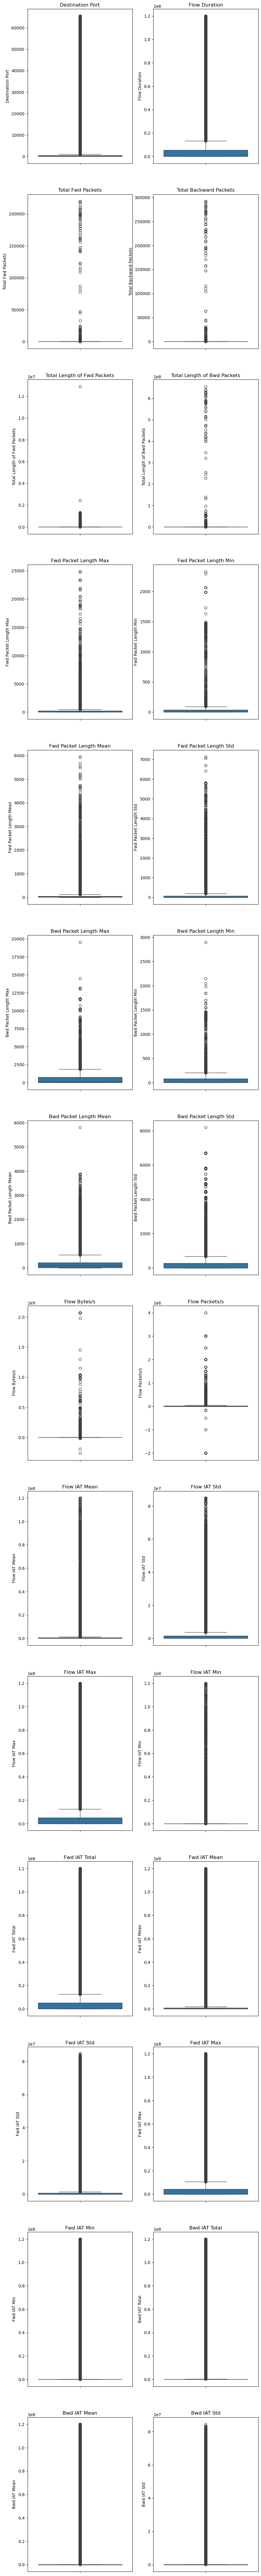

In [135]:
ncols = 2
nrows = int(merged_df.shape[1]/5)+1
fig_height = nrows * 8  
fig_width = ncols * 5 
fig, axes = plt.subplots(nrows = nrows,ncols = ncols,figsize=(fig_width, fig_height))

for i, (ax, col) in enumerate(zip(axes.flatten(), merged_df.columns)):
    sns.boxplot(merged_df[col], ax=ax)
    ax.set_title(f"{col}")
    
plt.show()


In [47]:
merged_df.to_csv('data/cicids17.csv')